# Customer Retention Analysis
Business can thrive and dive depending upon how happy your customers are, how loyal they are, and how willing they are to keep buying your services. Loyal customers are worth up to 10 times as much their first purchase and it is 6 to 7 times more expensive to land a new customer than to keep a current one. 

This project is aimed to

1. Understand the causes and/or scenarios causing attrition of customers 
2. Provide a predictive model that ranks the customers 
3. Learn the factors which are strongly correlated with churn rate 
4. Make recommendations to minimize the revenue loss 



# Dataset
In this project We will be using the [Telco Customer Churn dataset](https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv) to study the customer behavior in order to develop focused customer retention programs.

This dataset has 7043 samples and 21 features, the features includes 

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

# Questions we will try to answer during this project

1. Which variables influences if the client will leave? 
2. What are the most important variables to look?
3. Which clients have the highest chance of leaving?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from IPython.display import display
import pickle

# Data Ingestion

In [2]:
#Loading the data
df = pd.read_excel("Customer-Churn-Dataset.xls")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.9        8
19.65       8
45.3        7
19.55       7
19.45       6
20.15       6
20.25       6
20.3        5
20.45       5
69.65       4
19.3        4
19.85       4
49.9        4
19.95       4
20.5        4
74.7        4
20.4        4
69.9        4
70.6        4
69.95       4
19.5        4
69.6        4
50.15       4
20.35       4
44          4
44.4        4
           ..
6792.45     1
762.45      1
6794.75     1
761.85      1
760.05      1
6744.2      1
6743.55     1
1348.9      1
63.15       1
4447.75     1
6707.15     1
2917.65     1
62.9        1
6710.5      1
6713.2      1
914         1
6716.45     1
6717.9      1
6719.9      1
6741.15     1
139.25      1
265.75      1
6725.5      1
2603.3      1
743.05      1
6733        1
4443.45     1
6735.05     1
742.9       1
4764        1
Name: TotalCharges, Length: 6531, dtype: int64

**Since we have 11 missing values in variable 'TotalCharges', so we will replace these empty spaces ith NA values.**

In [6]:
#Replacing empty spaces with Null values
df = df.replace(r'^\s+$', np.nan, regex=True)

In [7]:
df['TotalCharges'].value_counts()

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
45.30       7
19.55       7
19.45       6
20.15       6
20.25       6
20.30       5
20.45       5
69.95       4
69.90       4
19.85       4
69.60       4
44.40       4
69.65       4
19.50       4
19.20       4
19.95       4
49.90       4
20.50       4
20.35       4
70.60       4
44.00       4
50.15       4
19.40       4
75.30       4
74.70       4
           ..
1971.15     1
1793.25     1
1212.85     1
1504.05     1
1319.95     1
572.20      1
5958.85     1
1673.80     1
958.15      1
7610.10     1
92.05       1
2666.75     1
1001.50     1
7262.00     1
4740.00     1
96.45       1
4483.95     1
5574.75     1
44.65       1
2688.45     1
1374.35     1
3107.30     1
248.95      1
607.30      1
1534.05     1
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [9]:
df['TotalCharges'].isnull().sum()

11

**Now all the empty spaces are removed from the dataset, now the dataset is almost complete so I will drop the few NA rows that has Null values**

In [10]:
# Dropping NA values
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

# Feature Engineering

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.

In the dataset:
    
* There are columns with a scope of transformation, like SeniorCitizen
* There is no null data in the dataset as it has been removed intially
* Variable like CustomerId is redundant as it does not help in prediction of the churn of the clients
* As per Numerical variable analysis TotalCharges and Monthly Charges are correlated and TotalCharges is approximately equal to product of MonthlyCharges and tenure which makes TotalCharges redundant




**Let us change the 'SeniorCitizen' variable from interger to categorial as this variable signifies the status of seniority of the customer**

In [12]:
df['SeniorCitizen']=pd.Categorical(df['SeniorCitizen'])

**So until now I have checked the size of my dataset,'CustomerId' is specific and unique to every row and it doesn’t help to predict if the client is going to Churn. So we will delete the CustomerID.**

In [13]:
# Deleting the custumerID column
del df["customerID"]

## Lets split the dataset into numeric and objects to facilitate the analysis

In [14]:
#Splitting data according to datatypes
num = ['float64', 'int64']
num_df = df.select_dtypes(include=num)
obj_df = df.select_dtypes(exclude=num)

In [15]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [16]:
obj_df.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [17]:
df.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

**The above gives us the idea that how the data is, and now we move further to analyze variables.**

In [18]:
#Converting SeniorCitizen variable into categorical and mapping values of Yes & No to 1 & 0 respectively
df['SeniorCitizen'] = df.SeniorCitizen.map({0:'No', 1:'Yes'})

In [19]:
#Removing TotalCharges variable from the data
del num_df["TotalCharges"]

In [20]:
#Creating bins for numerical variables for extensive prediction of churn
tenure_bins=pd.cut(num_df["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
MonthlyCharges_bins=pd.cut(num_df["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])


**So for the points above ,transformation of SeniorCitizen variable is done from integer to Categorical, Null values are deleted from the data and CutomerId has also been removed.**

**Now we will merge the numerical variables bins into dataframe and then concatenate with the categorical variables, after we need to transform the categorical variables into binary vectors and then we will split the dataset into training and test**

In [21]:
#Now Saving numeric variable bins into a dataframe
bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins]).T


In [22]:
# Concatenate bins with object variables
f=pd.concat([bins,obj_df],axis=1)

In [23]:
f.head()

,tenure,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,low,low,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,medium,medium,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,low,medium,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,medium,medium,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,low,high,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


## Dummy Variables

Dummy variables are used as devices to sort data into mutually exclusive categories, here we will be converting the categorial variables into dummy variables into extensive categories to indicate the occurance of major prediction values.

In [24]:
#Creating dataframe of dummy variables
f_dummies = pd.get_dummies(data=f, columns=['tenure', 'MonthlyCharges','gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])                                                 

In [25]:
f_dummies.head()

,Churn,tenure_high,tenure_low,tenure_medium,MonthlyCharges_high,MonthlyCharges_low,MonthlyCharges_medium,gender_Female,gender_Male,SeniorCitizen_0,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,0,1,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,No,0,0,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,Yes,0,1,0,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,No,0,0,1,0,0,1,0,1,1,...,0,0,1,0,1,0,1,0,0,0
4,Yes,0,1,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


**Splitting dependent and independent variables for extracting important features**

In [26]:
features = f_dummies.drop(["Churn"], axis=1).columns
X= f_dummies[features]
y = f_dummies["Churn"]

In [27]:
#Deleting Churn variuable from the dataframe
f1_dummies = f_dummies.drop(['Churn'],axis=1)

In [28]:
f1_dummies.head()

,tenure_high,tenure_low,tenure_medium,MonthlyCharges_high,MonthlyCharges_low,MonthlyCharges_medium,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,1,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,0,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,1,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,1,0,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


# Feature Selection

## Boruta Library
**We will be using Boruta for Feture selection technique**

In [29]:
!pip install Boruta

You are using pip version 9.0.1, however version 10.0.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [30]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [31]:
# Change X and y to its values
X_boruta = X.values
y_boruta = y.values

# Define random forest classifier, with utilising all cores and sampling in proportion to y labels
rfc = RandomForestClassifier(n_jobs=-1)
 
# Define Boruta feature selection method
feature_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
 
# Find all relevant features
feature_selector.fit(X_boruta, y_boruta)

#Transposing dataframe
f2_dummies = f1_dummies.T


# Check ranking of features
f2_dummies['Boruta_Rank'] = feature_selector.ranking_
f2_dummies

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	37


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	37


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	37


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	37


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	38


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	38


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	38


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	38


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40
Iteration: 	32 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	41


BorutaPy finished running.

Iteration: 	33 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	41


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


,0,1,2,3,4,5,6,7,8,9,...,7034,7035,7036,7037,7038,7039,7040,7041,7042,Boruta_Rank
tenure_high,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,1,6
tenure_low,1,0,1,0,1,1,0,1,0,0,...,0,1,1,0,0,0,1,1,0,1
tenure_medium,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
MonthlyCharges_high,0,0,0,0,1,1,1,0,1,0,...,1,1,1,0,1,1,0,1,1,30
MonthlyCharges_low,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,35
MonthlyCharges_medium,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,31
gender_Female,1,0,0,0,1,1,0,1,1,0,...,1,0,1,1,0,1,1,0,0,11
gender_Male,0,1,1,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,1,9
SeniorCitizen_0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,20
SeniorCitizen_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,23


In [32]:
#Adding a variable 'Feature' in the dataframe
f2_dummies['Feature']=  f2_dummies.index

In [33]:
# Sort the dataframe as per Mean Rank
f2_dummies = f2_dummies.sort_values('Boruta_Rank')

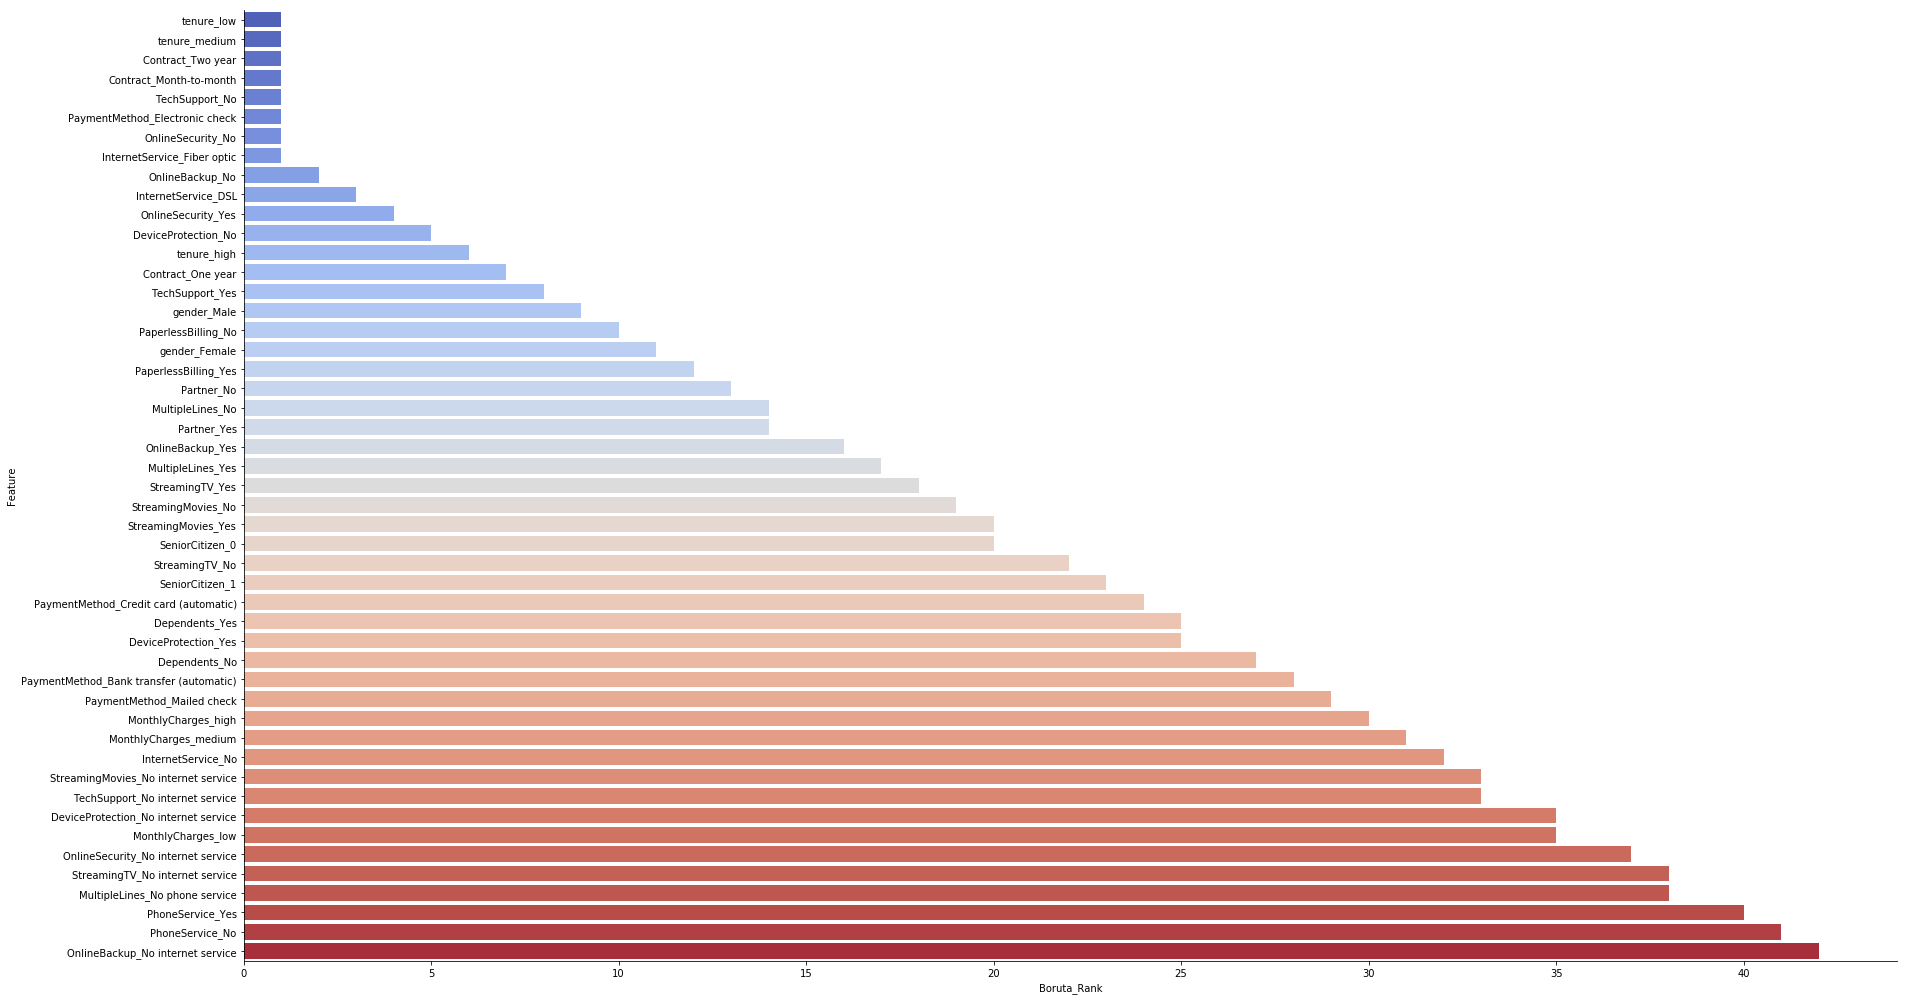

In [34]:
# Plot the ranking of the features

sns.factorplot(x='Boruta_Rank', y='Feature', data = f2_dummies, kind="bar", size=14, aspect=1.9, palette='coolwarm');
plt.figure(figsize=(15,16))

### Defining Hyperparameters
Upon Feature Selection using Boruta. Selected Top fetures including Rank 1 & 2 

* **tenure_low**
* **tenure_medium**
* **Contract_Month-to-month**
* **TechSupport_No**
* **PaymentMethod_Electronic check**
* **OnlineSecurity_No**
* **InternetService_Fiber optic**
* **OnlineBackup_No**
* **Contract_Two year**

In [35]:
f2_dummies.head(9)

,0,1,2,3,4,5,6,7,8,9,...,7035,7036,7037,7038,7039,7040,7041,7042,Boruta_Rank,Feature
tenure_low,1,0,1,0,1,1,0,1,0,0,...,1,1,0,0,0,1,1,0,1,tenure_low
tenure_medium,0,1,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,tenure_medium
Contract_Two year,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,Contract_Two year
Contract_Month-to-month,1,0,1,0,1,1,1,1,1,0,...,1,0,0,0,0,1,1,0,1,Contract_Month-to-month
TechSupport_No,1,1,1,0,1,1,1,1,0,1,...,1,0,0,0,1,1,1,0,1,TechSupport_No
PaymentMethod_Electronic check,1,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,PaymentMethod_Electronic check
OnlineSecurity_No,1,0,0,0,1,1,1,0,1,0,...,1,1,0,0,1,0,1,0,1,OnlineSecurity_No
InternetService_Fiber optic,0,0,0,0,1,1,1,0,1,0,...,1,0,0,0,1,0,1,1,1,InternetService_Fiber optic
OnlineBackup_No,0,1,0,1,1,1,0,1,1,0,...,1,0,0,1,0,1,1,1,2,OnlineBackup_No


In [36]:
#Selecting important featutres
final_selected_columns =  f2_dummies.head(9).index

In [37]:
#Exporting new dataset with selected columns
df_final = f_dummies[final_selected_columns]
df_final.head()

,tenure_low,tenure_medium,Contract_Two year,Contract_Month-to-month,TechSupport_No,PaymentMethod_Electronic check,OnlineSecurity_No,InternetService_Fiber optic,OnlineBackup_No
0,1,0,0,1,1,1,1,0,0
1,0,1,0,0,1,0,0,0,1
2,1,0,0,1,1,0,0,0,0
3,0,1,0,0,0,0,0,0,1
4,1,0,0,1,1,1,1,1,1


## Split training and testing dataset

**We will split our final dataset here to 80% for training and 20% for validation.**

In [38]:
#features = df_final.drop(["Churn"], axis=1).columns
X= df_final
Y =f_dummies["Churn"]
validation_size = 0.20

seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Training Models

We will try following models for prediction
    
* Logistic Regression
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier






**Here we are using the features with Rank 1**

For compairing different models we will use Kfold method and will use the best model to predict the test data 

In [39]:
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)
   
    

LR: 0.798759 (0.013001)
KNN: 0.767464 (0.033844)
CART: 0.796447 (0.012383)
RF: 0.795202 (0.012628)


From the above matrix Logistic Regression looks like the best option.

Now using different models on validation data


In [40]:
# Make predictions on validation dataset
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
model = models
rows = []
for name,model in models:
    
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    model = name
    acc = accuracy_score(Y_validation, predictions)
    rows.append((model,acc))

In [41]:
#Creating a dataframe for the metrics
Metrics =pd.DataFrame(rows, columns=["Model", "Accuracy"]) 

In [42]:
Metrics['Model_Rank'] = Metrics['Accuracy'].rank(ascending=False,method='max')
Metrics

,Model,Accuracy,Model_Rank
0,LR,0.788913,1.0
1,KNN,0.778252,4.0
2,CART,0.783937,3.0
3,RF,0.784648,2.0


**Tha Above metrics shows that Logistic Regression model have good overall prediction.**

In [43]:
# Store the result into csv
Metrics.to_csv('Metrics_Score.csv', index=False)

In [44]:
#Creating dataframe consisting models
Models =pd.DataFrame(models, columns=["Name","models"]) 
Models

,Name,models
0,LR,"LogisticRegression(C=1.0, class_weight=None, d..."
1,KNN,"KNeighborsClassifier(algorithm='auto', leaf_si..."
2,CART,"DecisionTreeClassifier(class_weight=None, crit..."
3,RF,"(DecisionTreeClassifier(class_weight=None, cri..."


In [45]:
#Creating another dataframe consisting models and Ranks
Models_df= pd.concat([Metrics,Models],axis=1,join = 'inner')
del Models_df['Accuracy']
del Models_df['Name']
Models_df

,Model,Model_Rank,models
0,LR,1.0,"LogisticRegression(C=1.0, class_weight=None, d..."
1,KNN,4.0,"KNeighborsClassifier(algorithm='auto', leaf_si..."
2,CART,3.0,"DecisionTreeClassifier(class_weight=None, crit..."
3,RF,2.0,"(DecisionTreeClassifier(class_weight=None, cri..."


# Pickle

Pickle is the standard way of serializing objects in Python. We can use the pickle operation to serialize our machine learning algorithms and save the serialized format to a file.
Later we can load this file to deserialize your model and use it to make new predictions.

In [46]:
dictionary1=pd.Series(Metrics.Model.values,index=Metrics.Model_Rank).to_dict()
print('Dictionary with Model Rank as Key and Model Name as values ',dictionary1)
dictionary2=pd.Series(Models_df.models.values,index=Models_df.Model_Rank).to_dict()
print('Dictionary with Model Rank as Key and Model_Var as values ',dictionary2)

Dictionary with Model Rank as Key and Model Name as values  {1.0: 'LR', 4.0: 'KNN', 3.0: 'CART', 2.0: 'RF'}
Dictionary with Model Rank as Key and Model_Var as values  {1.0: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), 4.0: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'), 3.0: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 2.0: RandomForestClassifier(bootstr

In [47]:
from collections import defaultdict
ds = [dictionary1, dictionary2]

dictionary = {}
for k in dictionary1.keys():
    dictionary[k] = tuple(dictionary[k] for dictionary in ds)

In [48]:
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(dictionary, open(filename, 'wb'),protocol=2)